In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Input, Dense, Conv2D, Conv1D, concatenate, Reshape, MaxPool2D
from keras import Model
import keras.backend as K
from IPython.display import display, Markdown
printm = lambda m: display(Markdown(m))

Using TensorFlow backend.


In [60]:
df = pd.read_csv('1000000_nets.csv')

In [61]:
df.head()

,code,g_layers,last_layer,loss_balance,m_layers,net_hash,parameters_count,x_layers
0,"x_conv2d_0 = Conv2D(filters=32, kernel_size=3,...",1,m_dense_0,0.951685,1,8cd9ab746133567bf3a30dce7bea238f,3546712,2
1,"\n\ng_conv1d_0 = Conv1D(filters=32, kernel_siz...",1,m_dense_1,0.980700,2,fd432aba10bfa7bb8c967b718405a570,1843999,1
2,"x_conv2d_0 = Conv2D(filters=16, kernel_size=5,...",1,m_dense_0,0.680693,1,f668a8a03cbc88ef3658775185001a42,935348,2
3,"x_maxpool2d_0 = MaxPool2D(pool_size=2, name='x...",1,m_dense_0,0.528944,1,bef9d47b5f7baec5e83dce263ca1e40b,1872952,1
4,"x_conv2d_0 = Conv2D(filters=16, kernel_size=5,...",1,m_dense_0,0.357991,1,18441881cd7c2efeb22bf204c4eb6871,912959,3


In [59]:
printm('### Number of unique SRANN:')
print(f'{df["code"].nunique():,}')

### Number of unique SRANN:

1,000,000


In [58]:
printm('### Example of a generated SRANN:')
print(f'{df.sample(1).iloc[0]["code"]}')

### Example of a generated SRANN:

x_conv2d_0 = Conv2D(filters=8, kernel_size=5, strides=1, name='x_conv2d_0')(X)
x_maxpool2d_1 = MaxPool2D(pool_size=2, name='x_maxpool2d_1')(x_conv2d_0)
x_dense_2 = Dense(units=53, activation='relu', name='x_dense_2')(x_maxpool2d_1)

g_conv1d_0 = Conv1D(filters=32, kernel_size=7, strides=1, name='g_conv1d_0')(g)
g_dense_1 = Dense(units=66, activation='relu', name='g_dense_1')(g_conv1d_0)
g_conv1d_2 = Conv1D(filters=32, kernel_size=7, strides=2, name='g_conv1d_2')(g_dense_1)

con = concatenate([Reshape((1, -1))(x_dense_2), Reshape((1, -1))(g_conv1d_2)], name='con')

m_dense_0 = Dense(units=144, activation='relu', name='m_dense_0')(con)

loss_balance = 0.9562


### SRANN string lengths
The lengths of the SRANN strings are important. The genetic autoencoder must be able to cope with the longest SRANN strings, although it doesn't have to do it perfectly. Anyway, a length limit of 1000 characters looks reasonable. 

<IPython.core.display.Javascript object>


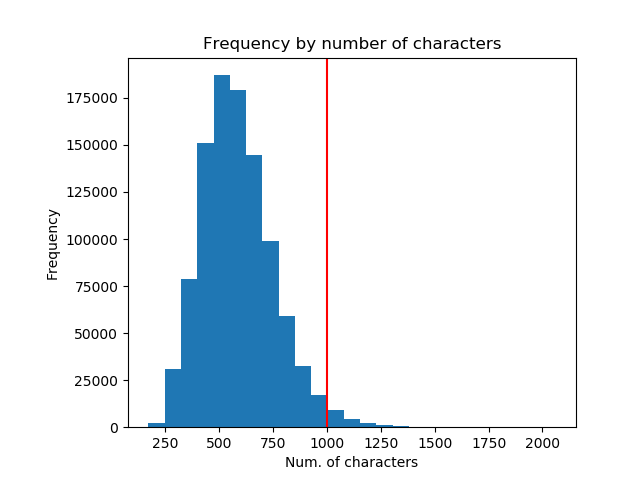

In [39]:
plt.figure()
df['code'].str.len().plot.hist(bins=25, title='Frequency by number of characters')
plt.xlabel('Num. of characters')
plt.subplots_adjust(left=0.2)
plt.axvline(1000, color='red');

### Number of parameters
The number of SRANN parameters (weights) is another aspect we need to take care of. In order to execute a large-scale experiment, we must ensure that the networks are not too big, because our computational power is limitied. A limit of $10^7$ parameters seems reasonable.

<IPython.core.display.Javascript object>


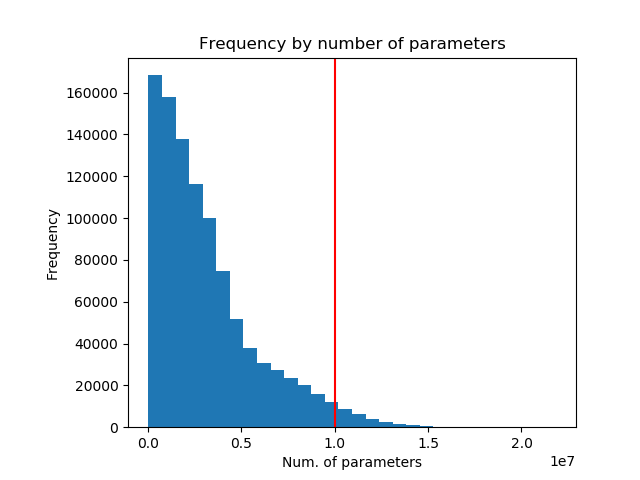

In [41]:
plt.figure()
df['parameters_count'].plot.hist(bins=30, title='Frequency by number of parameters')
plt.xlabel('Num. of parameters')
plt.subplots_adjust(left=0.2)
plt.axvline(1e+7, color='red');

### More insightful visualizations

<IPython.core.display.Javascript object>


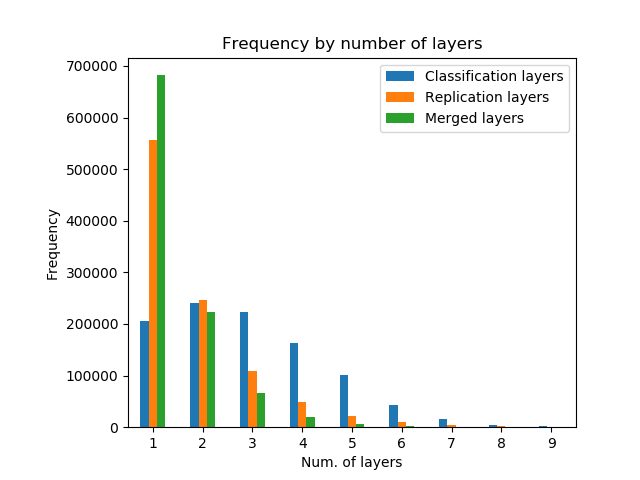

In [43]:
hists = df[['x_layers', 'g_layers', 'm_layers']].apply(lambda x: np.histogram(x, range(1, 11))[0])
hists.index += 1
hists.plot.bar(title='Frequency by number of layers', rot=0)
plt.xlabel('Num. of layers')
plt.ylabel('Frequency')
plt.subplots_adjust(left=0.2)
plt.legend(['Classification layers', 'Replication layers', 'Merged layers']);

Making sure that the loss balance parameters is uniformly distributed

<IPython.core.display.Javascript object>


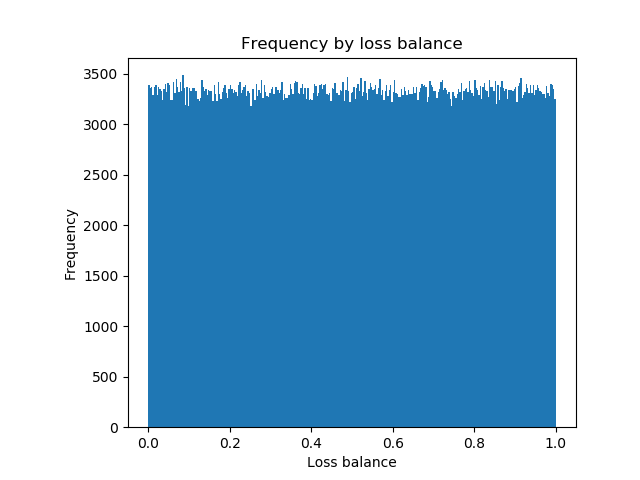

In [46]:
plt.figure()
df['loss_balance'].plot.hist(bins=300, title='Frequency by loss balance')
plt.xlabel('Loss balance')
plt.subplots_adjust(left=0.2);

## Example SRANN training
Parameters as defined in the research papers:

In [48]:
m, n, k, l = 28, 28, 350, 10

Data preparations

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.expand_dims(x_train.astype('float32') / 255, axis=3)
x_test = np.expand_dims(x_test.astype('float32') / 255, axis=3)
y_train = np.expand_dims(to_categorical(y_train, l), axis=1)
y_test = np.expand_dims(to_categorical(y_test, l), axis=1)

genotype_train = np.expand_dims(np.random.randn(x_train.shape[0], k), axis=2)
genotype_test = np.expand_dims(np.random.randn(x_test.shape[0], k), axis=2)

Sample a random SRANN from the generated SRANN examples

In [51]:
srann = df.assign(weights=df['parameters_count'].max() - df['parameters_count']).sample(1, weights='weights').iloc[0]
srann = df.sample(1).iloc[0]
print(srann['code'])

x_conv2d_0 = Conv2D(filters=32, kernel_size=7, strides=1, name='x_conv2d_0')(X)
x_conv2d_1 = Conv2D(filters=8, kernel_size=5, strides=1, name='x_conv2d_1')(x_conv2d_0)
x_maxpool2d_2 = MaxPool2D(pool_size=2, name='x_maxpool2d_2')(x_conv2d_1)
x_conv2d_3 = Conv2D(filters=32, kernel_size=3, strides=1, name='x_conv2d_3')(x_maxpool2d_2)
x_maxpool2d_4 = MaxPool2D(pool_size=2, name='x_maxpool2d_4')(x_conv2d_3)

g_conv1d_0 = Conv1D(filters=8, kernel_size=5, strides=1, name='g_conv1d_0')(g)
g_dense_1 = Dense(units=91, activation='relu', name='g_dense_1')(g_conv1d_0)

con = concatenate([Reshape((1, -1))(x_maxpool2d_4), Reshape((1, -1))(g_dense_1)], name='con')

m_dense_0 = Dense(units=187, activation='relu', name='m_dense_0')(con)
m_dense_1 = Dense(units=113, activation='relu', name='m_dense_1')(m_dense_0)
m_dense_2 = Dense(units=61, activation='relu', name='m_dense_2')(m_dense_1)
m_dense_3 = Dense(units=205, activation='relu', name='m_dense_3')(m_dense_2)

loss_balance = 0.8365


Model definition. The SRANN is sampled from the generated SRANN data base.

In [52]:
K.clear_session()

X = Input(shape=(m, n, 1), name='X')
g = Input(shape=(k, 1), name='g')

exec(srann['code'])

y_hat = Dense(l, activation='softmax', name='classification_output')(locals()[srann['last_layer']])
g_rep = Dense(k, activation='linear', name='replication_output')(locals()[srann['last_layer']])

model = Model(inputs=[X, g], outputs=[y_hat, g_rep])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X (InputLayer)                  (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
x_conv2d_0 (Conv2D)             (None, 22, 22, 32)   1600        X[0][0]                          
__________________________________________________________________________________________________
x_conv2d_1 (Conv2D)             (None, 18, 18, 8)    6408        x_conv2d_0[0][0]                 
__________________________________________________________________________________________________
x_maxpool2d_2 (MaxPooling2D)    (None, 9, 9, 8)      0           x_conv2d_1[0][0]                 
__________________________________________________________________________________________________
g (InputLa

Training

In [53]:
losses = ['categorical_crossentropy', 'mse']

loss_weights = {
    'classification_output': np.clip(srann['loss_balance'], 0, 1), 
    'replication_output': 1 - np.clip(srann['loss_balance'], 0, 1)
}

metrics = {
    'classification_output': 'categorical_accuracy', 
    'replication_output': 'mse'
}

model.compile(optimizer='adadelta', loss=losses, loss_weights=loss_weights, metrics=metrics)

In [54]:
model.fit(x=[x_train, genotype_train], y=[y_train, genotype_train.reshape(-1, 1, k)],
          validation_data=([x_test, genotype_test], [y_test, genotype_test.reshape(-1, 1, k)]));

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 241s 4ms/step - loss: 0.4435 - classification_output_loss: 0.3133 - replication_output_loss: 1.1092 - classification_output_categorical_accuracy: 0.9052 - replication_output_mean_squared_error: 1.1092 - val_loss: 0.2588 - val_classification_output_loss: 0.1047 - val_replication_output_loss: 1.0473 - val_classification_output_categorical_accuracy: 0.9677 - val_replication_output_mean_squared_error: 1.0473
